<a href="https://colab.research.google.com/github/Rushikesh-Chavan-777/DeepLearning-Projects/blob/main/ANN_1_(No_hyper_parameters_tunning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading all the data and adding it to a pandas dataframe

In [ ]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
Y = dataset.iloc[:, 13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


Converting categorial values to numeric through one hot encoding. Using it the normal way because the categories on every column(axial 1 metric) are less in number.

In [ ]:
geography = pd.get_dummies(X["Geography"], drop_first = True)
gender = pd.get_dummies(X["Gender"], drop_first = True)
geography['Germany'] = geography['Germany'].astype(int)
geography['Spain'] = geography['Spain'].astype(int)
gender['Male'] = gender['Male'].astype(int)
geography.head()
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


Now, lets concatinate these rows to the X pandas dataframe.

In [ ]:
X = pd.concat([X, geography, gender], axis = 1)

Now, lets drop the already existing colums with categorical variables.

In [ ]:
X = X.drop(["Geography", "Gender"], axis = 1)

Now, visualising our final handled datset and also seeing the power of one hot encoding live at action.

In [ ]:
X.head(30)
X.shape

(10000, 11)

Now, that we have performed data preprocessing scaling, lets

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Finally creating the ANN. First, lets import all the things we need

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LeakyReLU, ReLU
from keras.layers import Conv2D, MaxPooling2D

Now, that we have keras, lets get the sequntial and initialise it with the name classifier

In [ ]:
classifier = Sequential()

Now, lets add 2 hidden layes and then a final output layer, not getting into much complexity as of now, lets get into just 2 hidden layers for now and each layer having 6 features

In [ ]:
classifier.add(Dense(units = 6, kernel_initializer= 'he_uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform', activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Now that we have added all our layers, lets compile the everything :)

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Now, that we are done compiling, lets get further and fit

In [ ]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

# list all data in history

print(model_history.history.keys())

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8597 - loss: 0.3336 - val_accuracy: 0.8508 - val_loss: 0.3614
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8668 - loss: 0.3204 - val_accuracy: 0.8519 - val_loss: 0.3598
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8614 - loss: 0.3290 - val_accuracy: 0.8546 - val_loss: 0.3581
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8645 - loss: 0.3287 - val_accuracy: 0.8603 - val_loss: 0.3574
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8619 - loss: 0.3302 - val_accuracy: 0.8542 - val_loss: 0.3607
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8705 - loss: 0.3185 - val_accuracy: 0.8538 - val_loss: 0.3584
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8623 - loss: 0.3308 - val_accuracy: 0.8527 - val_loss: 0.3588
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8520 - loss: 0.3382 - val_accu

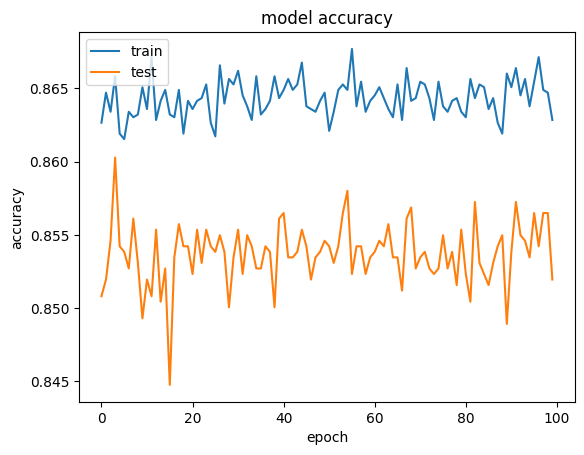

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

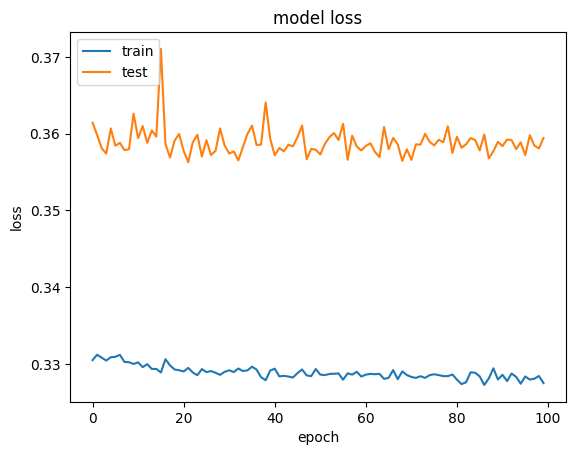

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
print(score)

0.8595
